Five Personality Traits (OCEAN)
Openness to experience (inventive/curious vs. consistent/cautious)
Conscientiousness (efficient/organized vs. easy-going/careless)
Extroversion (outgoing/energetic vs. solitary/reserved)
Agreeableness (friendly/compassionate vs. challenging/detached)
Neuroticism (sensitive/nervous vs. secure/confident)
Link para projeto e base de dados: https://www.kaggle.com/tunguz/big-five-personality-test

Importando as bibliotecas

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

Loading Dataset

In [38]:
data = pd.read_csv('C:/Users/NOTE/Desktop/Machine Learning/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')

Verifyng the Dataset

In [39]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6,1,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11,1,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7,1,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7,1,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,2179.00,3324.00,2255.00,430

Deleting irrelevant attributes and verifiyng the new dataset

In [40]:
data.drop(data.columns[50:110], axis=1, inplace=True)
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


In [41]:
data["EXT1"].value_counts()

EXT1
3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: count, dtype: int64

Analyzing the dataset statistic

In [42]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Verifying the count registration by value

In [43]:
data["EXT1"].value_counts()

EXT1
3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: count, dtype: int64

In [44]:
#Selecionando o total de registros com o valor zero.

In [45]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [46]:
#Limpando o Dataframe com apenas registros maiores que zero.

In [47]:
data = data[(data > 0.00).all(axis=1)]

In [48]:
#Verificando a contagem de registros por valor.

In [49]:
data["EXT1"].value_counts()

EXT1
3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: count, dtype: int64

In [50]:
#Qual o número de clusters que vamos definir?

In [51]:
#Instalando a yellowbrick

In [52]:
!pip install yellowbrick

In [53]:
#Importando as bibliotecas que iremos trabalhar

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [54]:
#Instanciando o método KMeans e o Visualizer.

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [55]:
#Selecionando uma amostra aleatória dos dados com 5000 observações.

data_sample = data.sample(n=5000, random_state=1)

C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_k

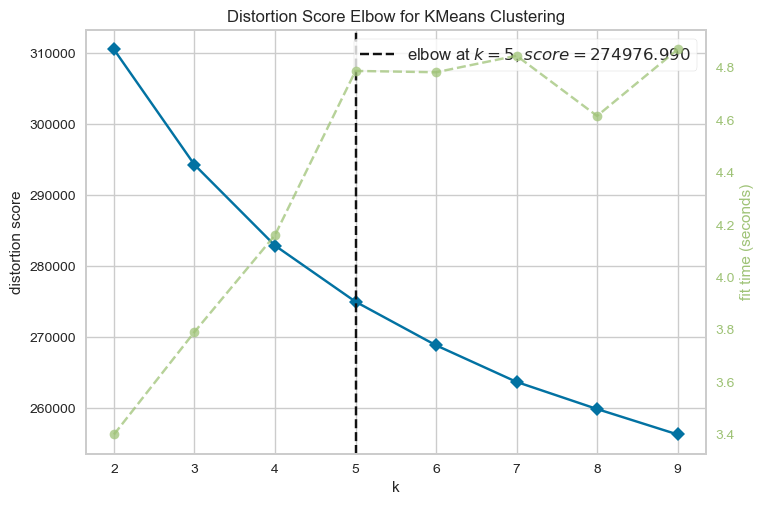

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
#Executando o teste.

visualizer.fit(data_sample)
visualizer.poof()

In [57]:
#Agrupando os participantes em 5 grupos
##Atribuindo os registros aos devidos grupos

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
#Inserindo os rótulos dos clusters no dataframe

predicoes = k_fit.labels_
data['Clusters'] = predicoes

In [59]:
#Verificando os dados

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,4
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,0
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,4


In [60]:
#Analisando os grupos
#Qual a quantidade de observações em cada grupo?

data["Clusters"].value_counts()

Clusters
3    193570
4    182762
2    181662
1    170398
0    146042
Name: count, dtype: int64

In [61]:
#Agrupando os registros por grupos

data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.17,3.44,2.81,3.58,2.63,2.86,2.13,3.70,2.71,3.98,2.42,3.73,3.12,3.00,2.39,2.10,2.39,2.00,2.69,2.37,3.08,3.01,2.66,2.87,3.27,2.76,3.13,2.96,2.70,3.08,3.28,2.92,3.83,2.47,2.43,2.82,3.55,2.59,2.88,3.51,3.73,1.95,3.80,2.05,3.80,2.05,4.09,3.32,3.92,3.85
1,1.80,3.64,2.23,4.07,2.29,3.19,1.74,4.08,2.17,4.49,4.29,2.46,4.52,2.13,3.57,3.89,4.00,3.78,4.01,3.96,2.46,3.38,2.59,3.85,2.56,3.87,2.72,3.44,3.67,3.06,2.82,3.38,3.81,3.49,2.08,3.50,3.57,3.05,2.77,3.31,3.52,2.38,4.07,2.13,3.43,2.09,3.69,3.19,4.29,3.72
2,2.14,3.28,3.11,3.65,2.99,2.70,2.23,4.00,2.33,4.12,3.55,3.07,4.17,2.62,2.84,2.83,2.89,2.45,2.99,2.72,1.86,3.98,1.68,4.38,1.96,4.18,1.99,4.00,4.19,3.73,3.85,2.22,4.29,2.02,3.25,2.06,4.17,2.02,3.85,3.89,3.56,2.17,3.88,2.08,3.71,2.00,4.00,2.96,4.26,3.78
3,3.45,1.91,3.80,2.50,4.06,1.82,3.66,2.76,3.78,3.00,3.83,2.95,4.25,2.42,3.28,3.48,3.81,3.46,3.65,3.19,2.14,4.30,2.66,4.20,2.00,4.02,1.85,3.91,4.14,3.86,2.98,3.63,3.85,3.25,2.22,3.53,3.47,2.83,2.94,3.49,3.78,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.22,4.21
4,3.47,1.95,4.34,2.23,4.27,1.67,3.88,2.81,3.75,2.52,2.32,3.85,3.15,3.32,2.12,1.91,2.11,1.67,2.12,1.72,1.89,4.45,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.59,4.20,1.90,3.13,2.28,3.88,1.95,3.59,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.33,3.25,4.11,4.29


In [62]:
#Calculando a média de cada grupo de questões para verificar um padrão.

#Selecionando as colunas de cada grupo.

col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [63]:
#Somando os valores de cada grupo

data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

In [64]:
#Exibindo o valor médio por grupo

data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.00,2.62,2.95,3.03,3.26
1,2.97,3.66,3.16,3.18,3.25
2,3.06,3.01,3.20,3.16,3.24
3,3.07,3.43,3.31,3.22,3.37
4,3.09,2.43,3.21,3.11,3.34


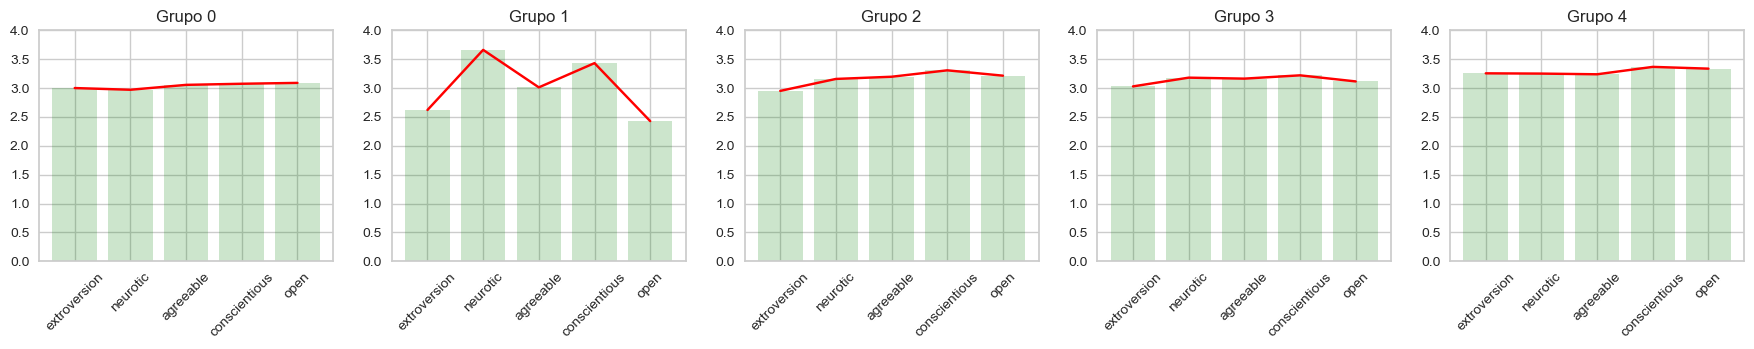

In [65]:
#Visualizando as médias por grupo.

data_clusters = data_soma.groupby('clusters').mean()

plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [66]:
#Criando uma planilha para entrar com os dados

data[:0].to_excel("perguntas.xlsx",index=False)

PermissionError: [Errno 13] Permission denied: 'perguntas.xlsx'

In [ ]:
#Recuperando os dados

meus_dados = pd.read_excel('perguntas.xlsx')

In [36]:
#Passando meus dados para o modelo

grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é: ', grupo_personalidade)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Clusters


In [34]:
#Meu grupo de personalidade é:  0
#Outra forma mais interessante...

#Instalando a biblioteca gradio

!pip install gradio

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.9 kB ? eta -:--:--
     ---------------------------------------- 50.9/50.9 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     -------------------------------------- 107.3/107.3 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.3 MB 31.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.7/12.3 MB 33.9 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/12.3 MB 31.9 MB/s eta 0:00:01
   ---------------- ----------------------- 5.0/12.3 MB 29.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.3 MB 26.5 MB/s eta 0:00:01
   ---------------------- ----------------- 7.0/12.3 MB 26.4 MB/s eta 0:00:01
   --------------------------- ------------ 8.3/12.3 M

In [73]:
import gradio as gr

In [68]:
#Lendo os dados com as questões.

dicio_questions = open("questions.txt").read().split("\n")

In [69]:
#Verificando os dados.

dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


In [70]:
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

In [71]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

In [81]:
# Criando os inputs dinâmicos
inputs_questions = []
for q in questions:
    obj_input = gr.Slider(minimum=1, maximum=5, step=1, value=3, label=q)
    inputs_questions.append(obj_input)

In [82]:
#Verificando os inputs

inputs_questions

In [84]:
#Criando a interface e a função predict.

def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)[0]

# Criando a interface
iface = gr.Interface(
    fn=predict,
    title="Big Five Personality",
    description="Sistema para detecção de traços de personalidade.",
    inputs=inputs_questions,
    outputs=gr.Textbox()
)

# Lançando a interface
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\Users\NOTE\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
